In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.3162   | 7.762     | 6.28      | 6.982     |
| 4         | -0.2734   | 3.354     | 9.969     | 3.47      |
| 6         | -0.2217   | 0.5427    | 1.852     | 2.241     |
| 10        | -0.2107   | 0.6261    | 4.211     | 4.491     |
| 15        | -0.2      | 0.1337    | 3.26      | 9.104     |
| 16        | -0.06574  | 1.176     | 8.345     | 0.3596    |
| 24        | -0.05295  | 1.207     | 8.909     | 0.3396    |
| 69        | -0.0455   | 0.7058    | 6.14      | 0.3       |
Curve params found
{'push': 0.7058448864909981,
 'shift': 6.139596612505802,
 'slope': 0.2999827386070118}
-
## Chance of nonscaling delay ##


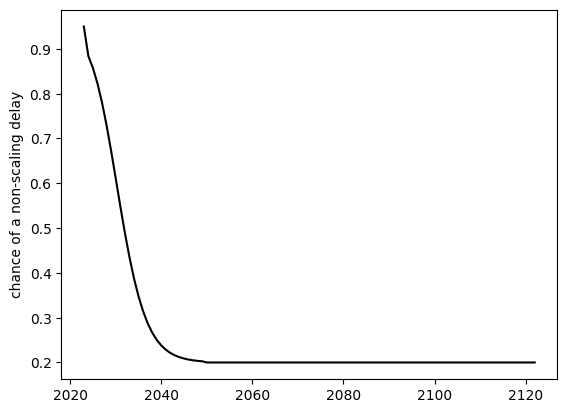

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 82%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 78%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 73%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 61%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2729   | 0.9449    | 7.672     | 3.197     |
| 39        | -0.2602   | 0.7558    | 9.358     | 5.91      |
| 42        | -0.25     | 0.01      | 5.314     | 3.844     |
| 44        | -0.2493   | 0.01      | 3.162     | 2.888     |
| 83        | -0.2099   | 0.01      | 2.876     | 1.824     |
| 84        | -0.2005   | 0.01      | 2.833     | 0.4384    |
| 85        | -0.02246  | 0.01      | 2.496     | 0.9872    |
| 86        | -0.01295  | 0.01      | 1.771     | 1.037     |
| 107       | -0.008865 | 0.01      | 2.04      | 1.02      |
Curve params found
{'push': 0.01, 'shift': 2.0397199092695577, 'slope': 1.020116404655654}
-
## Chance of nonscaling delay ##


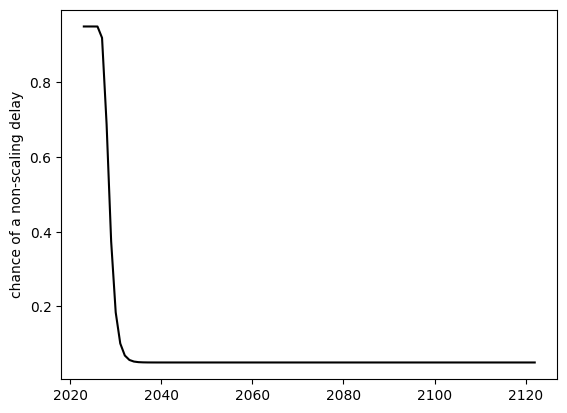

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 15        | -0.08454  | 1.291     | 7.993     | 0.5528    |
| 21        | -0.06331  | 0.8542    | 8.321     | 0.2162    |
| 51        | -0.04945  | 1.091     | 8.321     | 0.4038    |
Curve params found
{'push': 1.0911765732309404,
 'shift': 8.320845892035674,
 'slope': 0.4037592145071596}
-
## Chance of nonscaling delay ##


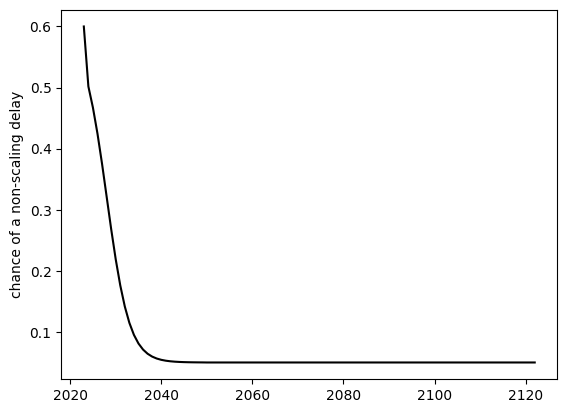

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2033

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.01687  | 0.4305    | 7.328     | 1.373     |
| 4         | -0.01664  | 0.1968    | 7.956     | 1.568     |
| 69        | -0.01664  | 0.01      | 7.217     | 1.961     |
Curve params found
{'push': 0.01, 'shift': 7.216591747335451, 'slope': 1.960689172111985}
-
## Chance of nonscaling delay ##


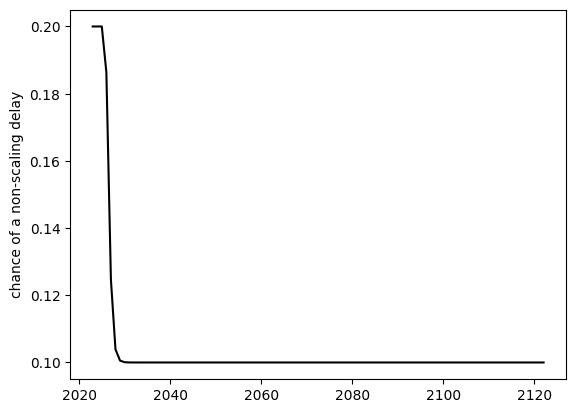

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.4, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

In [ ]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 7         | -0.0592   | 1.465     | 3.003     | 2.501     |
| 17        | -0.03346  | 0.3776    | 9.671     | 7.88      |
| 41        | -0.03333  | 0.01      | 7.495     | 7.117     |
| 55        | -0.03333  | 0.01      | 5.275     | 4.723     |
| 71        | -0.03333  | 0.01      | 4.365     | 3.554     |
| 74        | -0.03333  | 0.01      | 5.5       | 3.38      |
| 83        | -0.03333  | 0.01      | 0.4628    | 2.89      |
| 89        | -0.03316  | 0.01      | 5.111     | 1.742     |


## Save

In [ ]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')